In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [3]:
# load dataset
X, y = datasets.make_regression(
    n_samples=1000, n_features=1, noise=20, random_state=1
)


In [24]:
class Linear_Regression:
    def __init__(self, learning_rate=1e-3, n_iters=1000):
        self.lr = learning_rate
        self.niter = n_iters
        self.weights = 0 #B1, ..., Bn
        self.bias = 0 #B0
    
    def init_parameters(self, X, y):
        self.n, self.n_feat = X.shape
        self.weights = np.zeros(self.n_feat)
        self.bias = 0
        
    def update_parameters(self, dw, db):
        
        self.weights -= self.lr * dw #updating coefficients (weights)
        self.bias -= self.lr * db #updating bias (B0)
        
    def fit(self, X, y):
        self.init_parameters(X, y)
        
        for i in range(self.niter):
            y_hat = self.calc_predictions(X)
            dw, db = self.calc_gradients(X,y,y_hat)
            self.update_parameters(dw, db)
            
            # Add early-stopping
            
    def calc_gradients(self, X, y, y_hat):
        error = y_hat - y
        
        dw = np.dot(X.T, error)/self.n
        db = np.sum(error) / self.n
        
        return dw, db
        
    def calc_predictions(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def predict(self, X):
        y_hat = self.calc_predictions(X)
        return y_hat
    
def MSE (y, y_hat):
    MSE = np.mean((y-y_hat)**2)
    return MSE

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate regressor
linreg = Linear_Regression(learning_rate=0.005)
linreg.fit(X_train, y_train)

y_hat = linreg.predict(X_test)

print(MSE(y_test, y_hat))

450.57252328503773


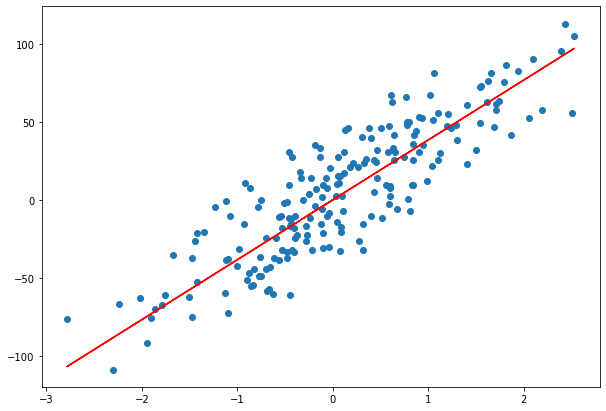

In [40]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(X_test,y_test)
ax.plot(X_test, y_hat, color = 'red')
plt.show()